In [4]:
import sys  
!{sys.executable} -m pip install --user matplotlib

In [5]:
%matplotlib notebook

import matplotlib.pyplot as plt
from itertools import product

all_colors = list(plt.cm.colors.cnames.keys())

In [9]:
front_gears = {
    'update centurion': [22, 32, 42],
    'centurion': [28, 34, 42],
    # 'merida 500': [26, 36],
    'merida 400': [32],
    }

rear_gears = {
    'update centurion': [12, 14, 16, 18, 21, 26, 32],
    'centurion': [14, 16, 18, 20, 22, 25, 28],
    # 'merida 500': [11, 13, 15, 17, 19, 21, 24, 28, 32, 37, 42],
    'merida 400': [11, 13, 15, 18, 21, 24, 28, 33, 39, 45, 51],
    }

In [10]:
from pprint import pprint
df = {
    name: sorted(
        (
            front / rear,
            len(front_gears[name]) - front_gears[name].index(front),
            len(rear_gears[name]) - 1 - rear_gears[name].index(rear),
            )
        for front, rear in product(front_gears[name], rear_gears[name])
        )
    for name in front_gears.keys()
    }

pprint(df)

{'centurion': [(1.0, 3, 0),
               (1.12, 3, 1),
               (1.2142857142857142, 2, 0),
               (1.2727272727272727, 3, 2),
               (1.36, 2, 1),
               (1.4, 3, 3),
               (1.5, 1, 0),
               (1.5454545454545454, 2, 2),
               (1.5555555555555556, 3, 4),
               (1.68, 1, 1),
               (1.7, 2, 3),
               (1.75, 3, 5),
               (1.8888888888888888, 2, 4),
               (1.9090909090909092, 1, 2),
               (2.0, 3, 6),
               (2.1, 1, 3),
               (2.125, 2, 5),
               (2.3333333333333335, 1, 4),
               (2.4285714285714284, 2, 6),
               (2.625, 1, 5),
               (3.0, 1, 6)],
 'merida 400': [(0.6274509803921569, 1, 0),
                (0.7111111111111111, 1, 1),
                (0.8205128205128205, 1, 2),
                (0.9696969696969697, 1, 3),
                (1.1428571428571428, 1, 4),
                (1.3333333333333333, 1, 5),
                (1.

<IPython.core.display.Javascript object>


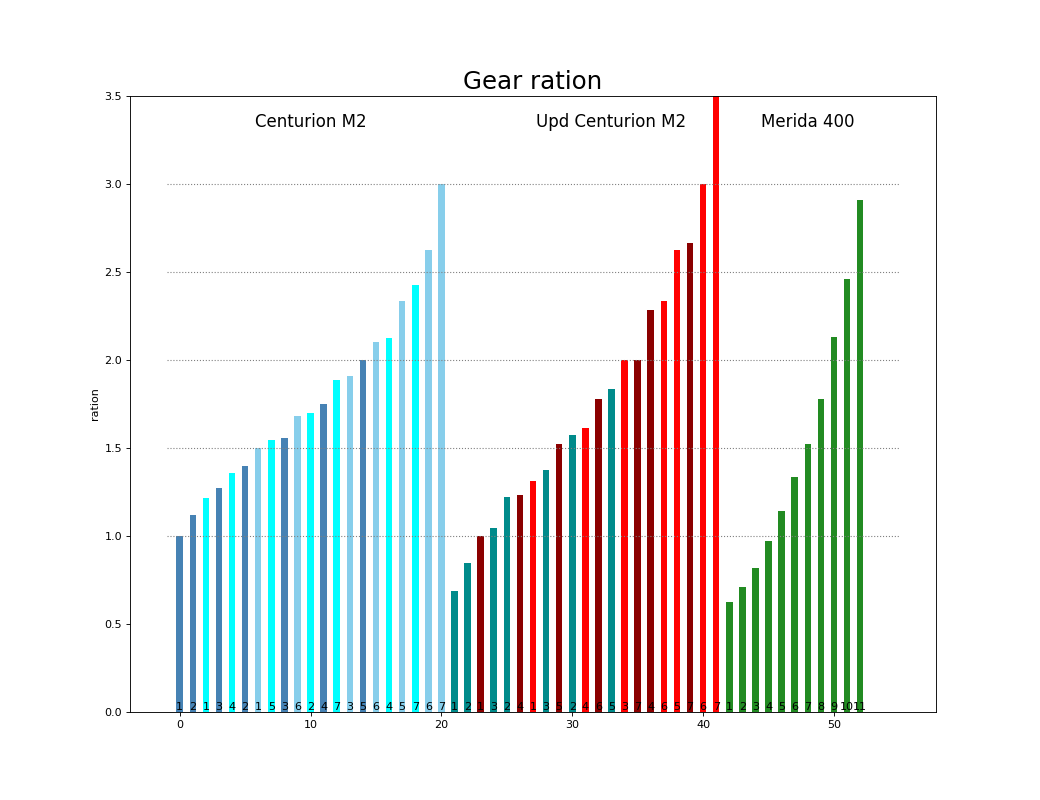

In [12]:
plt.figure(figsize=(13, 10), dpi=80)

indents = [0, 21, 21, 11]
plt.bar(
    range(indents[0], indents[1]),
    [x[0] for x in df['centurion']],
    color=[['skyblue', 'cyan', 'steelblue'][x[1]-1] for x in df['centurion']],
    width=0.5,
    )

plt.bar(
    range(indents[1], indents[1]+indents[2]),
    [x[0] for x in df['update centurion']],
    color=[['red', 'darkred', 'darkcyan'][x[1]-1] for x in df['update centurion']],
    width=0.5,
    )


plt.bar(
    range(indents[1]+indents[2], indents[1]+indents[2]+indents[3]),
    [x[0] for x in df['merida 400']],
    color=['forestgreen'],
    width=0.5,
    )


plt.hlines(1, -1, 55, color='gray', linewidth=1, linestyle=':')
plt.hlines(1.5, -1, 55, color='gray', linewidth=1, linestyle=':')
plt.hlines(2, -1, 55, color='gray', linewidth=1, linestyle=':')
plt.hlines(2.5, -1, 55, color='gray', linewidth=1, linestyle=':')
plt.hlines(3, -1, 55, color='gray', linewidth=1, linestyle=':')


# Decoration
gears = [x[2]+1 for values in df.values() for x in values]
for i, val in enumerate(gears):
    plt.text(
        i, 0, val,
        horizontalalignment='center',
        verticalalignment='bottom',
        fontdict={'fontweight': 500, 'size': 10},
        )

plt.text(
    10, 3.3, "Centurion M2",
    horizontalalignment='center',
    verticalalignment='bottom',
    fontdict={'fontweight': 500, 'size': 15},
    )

plt.text(
    33, 3.3, "Upd Centurion M2",
    horizontalalignment='center',
    verticalalignment='bottom',
    fontdict={'fontweight': 500, 'size': 15},
    )

plt.text(
    48, 3.3, "Merida 400",
    horizontalalignment='center',
    verticalalignment='bottom',
    fontdict={'fontweight': 500, 'size': 15},
    )

plt.title('Gear ration', fontsize=22)
plt.ylabel('ration')
plt.ylim(0, 3.5)

plt.show()